In [1]:
import pandas as pd
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.dates as md
from datetime import datetime

In [2]:
# nacitame data ze souboru
df = pd.read_table("/storage/experiments/2021/04_AIRDOSC_kalibrace/GEO/DATALOG.TXT", sep=',', header=None, names=list(range(500)), comment='*', engine='python')
df

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,$AIRDOS,GEO1,51832f3,1290c00806a200922457a000a000009c,NaN,NaN,None,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,$HIST,0,7.39,99342.50,16.94,12.0,65522,0,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,$HITS,0,None,None,NaN,NaN,None,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,$HIST,1,16.17,99347.50,16.94,6.0,65528,0,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,$HITS,0,None,None,NaN,NaN,None,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765,$HITS,0,None,None,NaN,NaN,None,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,$HIST,168,4811.48,99432.00,18.19,18.0,65516,0,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
767,$HITS,0,None,None,NaN,NaN,None,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
768,$HIST,169,4820.1,99433.25,18.19,8.0,65526,0,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.drop(df[df[0]=='$GPTXT'].index, inplace=True)
df.drop(df[df[0]=='$GPVTG'].index, inplace=True)
df.drop(df[df[0]=='$GPGLL'].index, inplace=True)
df.drop(df[df[0]=='$GPGSA'].index, inplace=True)
df.drop(df[df[0]=='$GPGSV'].index, inplace=True)
df.drop(df[df[0]=='$GPGGA'].index, inplace=True)
df.drop(df[df[0]=='$GPRMC'].index, inplace=True)
df.drop(df[df[0]=='$AIRDOS'].index, inplace=True)
df.drop(df[df[0]=='$TIME'].index, inplace=True)
#df.drop(df[df[0]=='$HITS'].index, inplace=True)
df['lat'] = 50.095441
df['lon'] = 14.282181
df['alt'] = 426.4

df[2] = df[2].fillna(method="ffill")
df = df.reset_index(drop=True)

df['meas'] = df.loc[df[0]=='$HIST',1]
df = df.fillna(method='ffill')

start = 1618225320

times = []
for i in range(len(df)):
    times.append(start + float(df.loc[i, 2]))

for i in range(len(times)):
    times[i] = datetime.utcfromtimestamp(times[i])
    
df['UTC'] = times

df

,0,1,2,3,4,5,6,7,8,9,...,495,496,497,498,499,lat,lon,alt,meas,UTC
0,$HIST,0,7.39,99342.50,16.94,12.0,65522,0,0.0,0,...,NaN,NaN,NaN,NaN,NaN,50.095441,14.282181,426.4,0,2021-04-12 11:02:07.390
1,$HITS,0,7.39,99342.50,16.94,12.0,65522,0,0.0,0,...,NaN,NaN,NaN,NaN,NaN,50.095441,14.282181,426.4,0,2021-04-12 11:02:07.390
2,$HIST,1,16.17,99347.50,16.94,6.0,65528,0,0.0,0,...,NaN,NaN,NaN,NaN,NaN,50.095441,14.282181,426.4,1,2021-04-12 11:02:16.170
3,$HITS,0,16.17,99347.50,16.94,6.0,65528,0,0.0,0,...,NaN,NaN,NaN,NaN,NaN,50.095441,14.282181,426.4,1,2021-04-12 11:02:16.170
4,$HIST,2,24.96,99346.75,16.94,11.0,65523,0,0.0,0,...,NaN,NaN,NaN,NaN,NaN,50.095441,14.282181,426.4,2,2021-04-12 11:02:24.960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,$HITS,0,4802.96,99438.25,18.19,14.0,65520,0,0.0,0,...,NaN,NaN,NaN,NaN,NaN,50.095441,14.282181,426.4,167,2021-04-12 12:22:02.960
336,$HIST,168,4811.48,99432.00,18.19,18.0,65516,0,0.0,0,...,NaN,NaN,NaN,NaN,NaN,50.095441,14.282181,426.4,168,2021-04-12 12:22:11.480
337,$HITS,0,4811.48,99432.00,18.19,18.0,65516,0,0.0,0,...,NaN,NaN,NaN,NaN,NaN,50.095441,14.282181,426.4,168,2021-04-12 12:22:11.480
338,$HIST,169,4820.1,99433.25,18.19,8.0,65526,0,0.0,0,...,NaN,NaN,NaN,NaN,NaN,50.095441,14.282181,426.4,169,2021-04-12 12:22:20.100


In [5]:
df.dropna(subset=['UTC'], inplace=True)
hist = df.loc[df[0]=='$HIST'].iloc[:,:270].copy()

In [7]:
hist.iloc[:,1:] = hist.iloc[:,1:].apply(pd.to_numeric) #,errors='coerce')
hist[0] = df[0]
hist['alt'] = df['alt'].apply(pd.to_numeric,errors='coerce')
hist['lat'] = df['lat'].apply(pd.to_numeric,errors='coerce')
hist['lon'] = df['lon'].apply(pd.to_numeric,errors='coerce')
hist['meas'] = df['meas'].apply(pd.to_numeric,errors='coerce')
hist['UTC'] = df['UTC']
hist.iloc[:,12:269] = 0
hist.set_index('meas', inplace=True)
hits = df.loc[df[0]=='$HITS'].copy()
hits.iloc[:,1:] = hits.iloc[:,1:].apply(pd.to_numeric)
hits.set_index('meas', inplace=True)

In [8]:
for index, row in hits.iterrows():
    for j in range(2,2+row[1]*2,2):
        hist.loc[index,int(row[j+1])+3] += 1

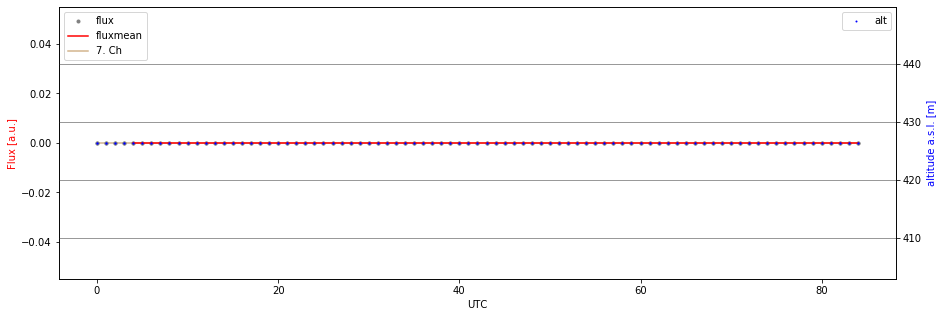

In [9]:
NOISE_LEVEL = 7
LAST_CHANNEL = 270
WINDOW = 10

plt.figure(figsize=(15,5))
plt.tight_layout()
#matplotlib.rcParams.update({'font.size': 15})


xx = hist
#xx.set_index('UTC', inplace = True, drop=False)
#xx = xx.loc['2019-11-27 00:00:00':'2019-11-29 01:30:00']
#xx = xx.loc['2020-12-04 11:55:00':'2020-12-04 12:20:00']


xx['flux'] = (xx.iloc[:,range(NOISE_LEVEL,LAST_CHANNEL)].sum(axis=1))

xx['fluxmean'] = xx['flux'].rolling(WINDOW).mean()

xx['flux'].plot(c='gray', linestyle='', marker='.')
xx['fluxmean'].plot(c='red')
(xx.iloc[:,NOISE_LEVEL]).plot(c='tan',label= str(NOISE_LEVEL) + '. Ch' ,zorder=1)

#s = fto.split('/')
#plt.title(s[len(s)-2] + ' (rolling mean ' + str(WINDOW) + ')')
#plt.ylim([0,1.5])
plt.xlabel('UTC')
plt.ylabel(r'Flux [a.u.]', color='red')
plt.legend(loc=2)

ax = plt.twinx()

#plt.ylim([0,14000])
xx['alt'].plot(c='b', label='alt', marker='.', ms=2, linewidth='2', linestyle='none', drawstyle='steps-mid')
plt.ylabel('altitude a.s.l. [m]', color='blue')

plt.grid(b=True, which='major', color='grey', linestyle='-')
plt.grid(b=True, which='minor', color='grey', linestyle='-')
plt.legend()


In [10]:
for i in range(13,200):
    print(i,np.sum(df[i]))

13 0.0
14 0.0
15 0.0
16 0.0
17 0.0
18 0.0
19 0.0
20 0.0
21 0.0
22 0.0
23 0.0
24 0.0
25 0.0
26 0.0
27 0.0
28 0.0
29 0.0
30 0.0
31 0.0
32 0.0
33 0.0
34 0.0
35 0.0
36 0.0
37 0.0
38 0.0
39 0.0
40 0.0
41 0.0
42 0.0
43 0.0
44 0.0
45 0.0
46 0.0
47 0.0
48 0.0
49 0.0
50 0.0
51 0.0
52 0.0
53 0.0
54 0.0
55 0.0
56 0.0
57 0.0
58 0.0
59 0.0
60 0.0
61 0.0
62 0.0
63 0.0
64 0.0
65 0.0
66 0.0
67 0.0
68 0.0
69 0.0
70 0.0
71 0.0
72 0.0
73 0.0
74 0.0
75 0.0
76 0.0
77 0.0
78 0.0
79 0.0
80 0.0
81 0.0
82 0.0
83 0.0
84 0.0
85 0.0
86 0.0
87 0.0
88 0.0
89 0.0
90 0.0
91 0.0
92 0.0
93 0.0
94 0.0
95 0.0
96 0.0
97 0.0
98 0.0
99 0.0
100 0.0
101 0.0
102 0.0
103 0.0
104 0.0
105 0.0
106 0.0
107 0.0
108 0.0
109 0.0
110 0.0
111 0.0
112 0.0
113 0.0
114 0.0
115 0.0
116 0.0
117 0.0
118 0.0
119 0.0
120 0.0
121 0.0
122 0.0
123 0.0
124 0.0
125 0.0
126 0.0
127 0.0
128 0.0
129 0.0
130 0.0
131 0.0
132 0.0
133 0.0
134 0.0
135 0.0
136 0.0
137 0.0
138 0.0
139 0.0
140 0.0
141 0.0
142 0.0
143 0.0
144 0.0
145 0.0
146 0.0
147 0.0
148 0.0